<a href="https://colab.research.google.com/github/SwathiTejahY/deploy1/blob/main/corrected_cocoon_cloud_security_ontology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simplified CoCoOn Cloud Security Ontology**
This notebook demonstrates a minimal version of the CoCoOn Cloud Security Ontology for cloud environments using RDFLib in Python. It models relationships between assets, vulnerabilities, threats, and controls.

## **Step 1: Install Required Libraries**

In [ ]:
!pip install rdflib pandas networkx matplotlib

## **Step 2: Import Libraries**

In [ ]:
from rdflib import Graph, Namespace, RDF, OWL, URIRef
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## **Step 3: Initialize Ontology and Namespace**

In [ ]:
# Initialize the graph and define namespace
g = Graph()
COCOON = Namespace("http://example.org/cocoon#")
g.bind("cocoon", COCOON)

# Define Classes
g.add((COCOON.Asset, RDF.type, OWL.Class))
g.add((COCOON.Threat, RDF.type, OWL.Class))
g.add((COCOON.Vulnerability, RDF.type, OWL.Class))
g.add((COCOON.Control, RDF.type, OWL.Class))

# Define Relationships
g.add((COCOON.hasVulnerability, RDF.type, OWL.ObjectProperty))
g.add((COCOON.exploitedBy, RDF.type, OWL.ObjectProperty))
g.add((COCOON.mitigatedBy, RDF.type, OWL.ObjectProperty))

<Graph identifier=Nf7e546aa63eb463aa6a0fa2a24bce4e3 (<class 'rdflib.graph.Graph'>)>

## **Step 4: Add Instances and Relationships**

In [ ]:
# Add Instances
asset1 = URIRef(COCOON.CloudServer)
vuln1 = URIRef(COCOON.DataExposure)
threat1 = URIRef(COCOON.MalwareAttack)
control1 = URIRef(COCOON.Encryption)

# Define relationships
g.add((asset1, RDF.type, COCOON.Asset))
g.add((asset1, COCOON.hasVulnerability, vuln1))
g.add((vuln1, RDF.type, COCOON.Vulnerability))
g.add((vuln1, COCOON.exploitedBy, threat1))
g.add((threat1, RDF.type, COCOON.Threat))
g.add((vuln1, COCOON.mitigatedBy, control1))
g.add((control1, RDF.type, COCOON.Control))

<Graph identifier=Nf7e546aa63eb463aa6a0fa2a24bce4e3 (<class 'rdflib.graph.Graph'>)>

## **Step 5: Query the Ontology**

In [ ]:
# Query for vulnerabilities and the threats exploiting them
results = []
for s, p, o in g.triples((None, COCOON.exploitedBy, None)):
    results.append((s.split("#")[-1], o.split("#")[-1]))

# Convert to pandas DataFrame
df = pd.DataFrame(results, columns=["Vulnerability", "Exploited By"])
print("--- Query Results ---")
print(df)

--- Query Results ---
  Vulnerability   Exploited By
0  DataExposure  MalwareAttack


## **Step 6: Visualize Results as a Graph**

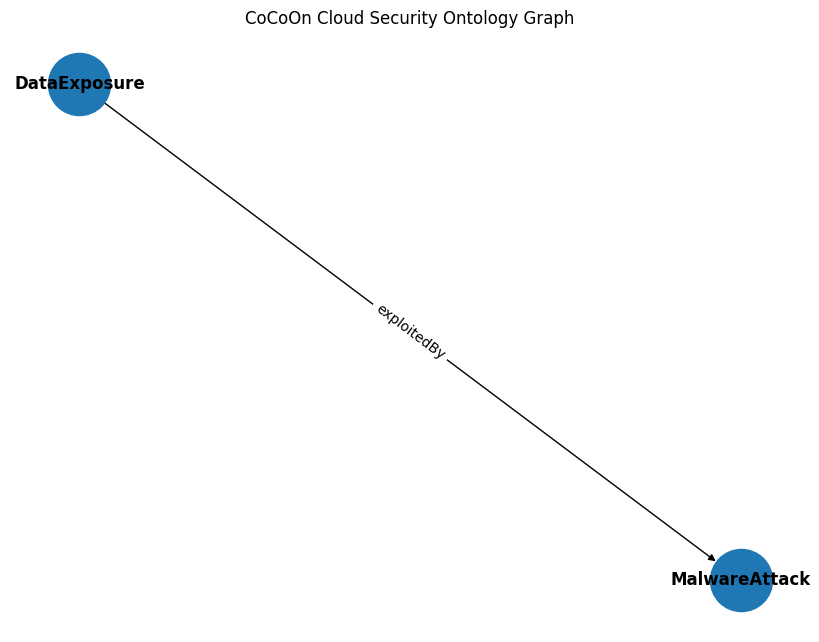

In [ ]:
# Visualize relationships with NetworkX
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['Vulnerability'], row['Exploited By'], label='exploitedBy')

# Draw graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)})
plt.title("CoCoOn Cloud Security Ontology Graph")
plt.show()

## **Step 7: Save Ontology to File**

In [ ]:
# Save the ontology in Turtle format
output_path = "/content/cocoon_cloud_security_ontology.ttl"
g.serialize(destination=output_path, format="turtle")
print(f"Ontology saved to: {output_path}")

Ontology saved to: /content/cocoon_cloud_security_ontology.ttl
